In [5]:
# all imports and magic commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [6]:
movie_data=pd.read_csv('moviereviews_train.tsv',sep='\t')

In [7]:
# see the first 10 rows (header = head)
movie_data.head(10)
#We see 0 = False (bad review), 1 = True (good review)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
5,8196_8,1,I dont know why people think this is such a ba...
6,7166_2,0,"This movie could have been very good, but come..."
7,10633_1,0,I watched this video at a friend's house. I'm ...
8,319_1,0,"A friend of mine bought this film for £1, and ..."
9,8713_10,1,<br /><br />This movie is full of references. ...


In [8]:
movie_data.shape

(25000, 3)

In [9]:
positive_movie_data = movie_data[(movie_data['sentiment'] == 1)]

In [10]:
#so we know half the comments are positive 
positive_movie_data.shape

(12500, 3)

In [11]:
negative_movie_data = movie_data[(movie_data['sentiment'] == 0)]

In [12]:
help(BinaryClassificationPerformance)

Help on class BinaryClassificationPerformance in module my_measures:

class BinaryClassificationPerformance(builtins.object)
 |  BinaryClassificationPerformance(predictions, labels, desc, probabilities=None)
 |  
 |  Performance measures to evaluate the fit of a binary classification model, v1.02
 |  
 |  Methods defined here:
 |  
 |  __init__(self, predictions, labels, desc, probabilities=None)
 |      Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y
 |  
 |  compute_measures(self)
 |      Compute performance measures defined by Flach p. 57
 |  
 |  img_indices(self)
 |      Get the indices of true and false positives to be able to locate the corresponding images in a list of image names
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the obj

In [13]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data(fn, my_random_seed, test=False):
    # read and summarize data
    movie_data = pd.read_csv(fn, sep='\t')
    print("movie_data is:", type(movie_data))
    print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
    print("the data types for each of the columns in movie_data:")
    print(movie_data.dtypes, "\n")
    print("the first 10 rows in movie_data:")
    print(movie_data.head(5))
    if (not test):
        print("The rate of 'good' movie reviews in the dataset: ")
        print(movie_data['sentiment'].mean())

In [14]:
help(BinaryClassificationPerformance)

Help on class BinaryClassificationPerformance in module my_measures:

class BinaryClassificationPerformance(builtins.object)
 |  BinaryClassificationPerformance(predictions, labels, desc, probabilities=None)
 |  
 |  Performance measures to evaluate the fit of a binary classification model, v1.02
 |  
 |  Methods defined here:
 |  
 |  __init__(self, predictions, labels, desc, probabilities=None)
 |      Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y
 |  
 |  compute_measures(self)
 |      Compute performance measures defined by Flach p. 57
 |  
 |  img_indices(self)
 |      Get the indices of true and false positives to be able to locate the corresponding images in a list of image names
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the obj

In [38]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data(fn, my_random_seed, test=False):
    # read and summarize data
    movie_data = pd.read_csv(fn, sep='\t')
    print("movie_data is:", type(movie_data))
    print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
    print("the data types for each of the columns in movie_data:")
    print(movie_data.dtypes, "\n")
    print("the first 10 rows in movie_data:")
    print(movie_data.head(5))
    if (not test):
        print("The rate of 'good' movie reviews in the dataset: ")
        print(movie_data['sentiment'].mean())


    # vectorize Bag of Words from review text; as sparse matrix
    #if (not test): # fit_transform()
        #hv = HashingVectorizer(n_features=2 ** 17, alternate_sign=False)
        #X_hv = hv.fit_transform(movie_data.review)
        #fitted_transformations.append(hv)
        #print("Shape of HashingVectorizer X:")
        #print(X_hv.shape)
    #else: # transform() 
        #X_hv = fitted_transformations[0].transform(movie_data.review)
        #print("Shape of HashingVectorizer X:")
        #print(X_hv.shape)
    
    # Commented out hashing vectorizer, used Cv instead.
    if (not test):
        from sklearn.feature_extraction.text import CountVectorizer
        #Commented out because including ngrams meant no change when alpha changed in RidgeClassifier()
        #cv = CountVectorizer(analyzer='word', ngram_range=(2, 2))
        cv = CountVectorizer()
        X_cv = cv.fit_transform(movie_data['review'])
        fitted_transformations.append(cv)
        print("Shape of CountingVectorizer X:")
        print(X_cv.shape)   
    else: # transform() 
        X_cv = fitted_transformations[0].transform(movie_data.review)
        print("Shape of CountingVectorizer X:")
        print(X_cv.shape)
        
            # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    if (not test):
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_cv)
        fitted_transformations.append(transformer)
    else:
        X_tfidf = fitted_transformations[1].transform(X_cv)
    
    # create additional quantitative features
    # features from Amazon.csv to add to feature set
    movie_data['word_count'] = movie_data['review'].str.split(' ').str.len()
    #movie_data['all_caps'] = movie_data['review'].str.isupper()
    #All caps does not seem to be good feature, but will try to look at indiviudal all caps words in review, not full review
    movie_data['punc_count'] = movie_data['review'].str.count("\.")
    movie_data['punc_count_2'] = movie_data['review'].str.count("\!")

    X_quant_features = movie_data[["word_count", "punc_count", "punc_count_2"]]
    print("Look at a few rows of the new quantitative features: ")
    print(X_quant_features.head(10))
    
    # Combine all quantitative features into a single sparse matrix
    X_quant_features_csr = csr_matrix(X_quant_features)
    X_combined = hstack([X_tfidf, X_quant_features_csr])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
    # feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        fitted_transformations.append(sc)
        print(X.shape)
        y = movie_data['sentiment']
    else:
        X = fitted_transformations[4].transform(X_matrix)
        print(X.shape)
        
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(movie_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, movie_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

In [16]:
# create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data(fn='moviereviews_train.tsv', my_random_seed=5)

print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 3 columns 

the data types for each of the columns in movie_data:
id           object
sentiment     int64
review       object
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...
The rate of 'good' movie reviews in the dataset: 
0.5
Shape of CountingVectorizer X:
(25000, 1438983)
Look at a few rows of the new quantitative features: 
   word_count  punc_count  punc_count_2
0         433          20             1
1         158          16             0
2         378          20         

In [39]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier(alpha = 20.0)
rdg.fit(X_train, y_train)

rdg_performance_train = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train')
rdg_performance_train.compute_measures()
print(rdg_performance_train.performance_measures)

{'Pos': 9961, 'Neg': 10039, 'TP': 9961, 'TN': 10039, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_train'}


In [40]:
from sklearn import linear_model
rdg1 = linear_model.RidgeClassifier(alpha = 0.5)
rdg1.fit(X_train, y_train)

rdg1_performance_train = BinaryClassificationPerformance(rdg1.predict(X_train), y_train, 'rdg1_train')
rdg1_performance_train.compute_measures()
print(rdg1_performance_train.performance_measures)

{'Pos': 9961, 'Neg': 10039, 'TP': 9961, 'TN': 10039, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg1_train'}


In [41]:
from sklearn import linear_model
rdg2 = linear_model.RidgeClassifier(alpha = 10.0)
rdg2.fit(X_train, y_train)

rdg2_performance_train = BinaryClassificationPerformance(rdg2.predict(X_train), y_train, 'rdg2_train')
rdg2_performance_train.compute_measures()
print(rdg2_performance_train.performance_measures)

{'Pos': 9961, 'Neg': 10039, 'TP': 9961, 'TN': 10039, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg2_train'}


In [44]:
from sklearn import linear_model
rdg3 = linear_model.RidgeClassifier(alpha = 100.0)
rdg3.fit(X_train, y_train)

rdg3_performance_train = BinaryClassificationPerformance(rdg3.predict(X_train), y_train, 'rdg3_train')
rdg3_performance_train.compute_measures()
print(rdg3_performance_train.performance_measures)

{'Pos': 9961, 'Neg': 10039, 'TP': 9961, 'TN': 10039, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg3_train'}


In [45]:
from sklearn import linear_model
rdg4 = linear_model.RidgeClassifier(alpha = 0.1)
rdg4.fit(X_train, y_train)

rdg4_performance_train = BinaryClassificationPerformance(rdg4.predict(X_train), y_train, 'rdg4_train')
rdg4_performance_train.compute_measures()
print(rdg4_performance_train.performance_measures)

{'Pos': 9961, 'Neg': 10039, 'TP': 9961, 'TN': 10039, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg4_train'}


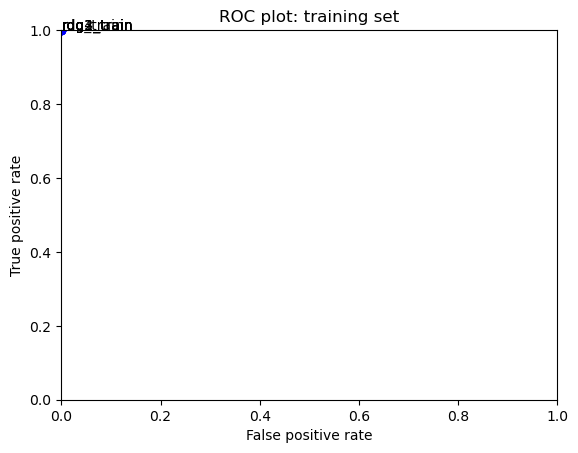

In [46]:
fits = [rdg_performance_train, rdg1_performance_train, rdg2_performance_train, rdg3_performance_train, rdg4_performance_train]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: training set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [48]:
rdg_performance_test = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test')
rdg_performance_test.compute_measures()
print(rdg_performance_test.performance_measures)

{'Pos': 2539, 'Neg': 2461, 'TP': 2331, 'TN': 2147, 'FP': 314, 'FN': 208, 'Accuracy': 0.8956, 'Precision': 0.8812854442344046, 'Recall': 0.9180779834580544, 'desc': 'rdg_test'}


In [49]:
rdg1_performance_test = BinaryClassificationPerformance(rdg1.predict(X_test), y_test, 'rdg1_test')
rdg1_performance_test.compute_measures()
print(rdg1_performance_test.performance_measures)

{'Pos': 2539, 'Neg': 2461, 'TP': 2331, 'TN': 2147, 'FP': 314, 'FN': 208, 'Accuracy': 0.8956, 'Precision': 0.8812854442344046, 'Recall': 0.9180779834580544, 'desc': 'rdg1_test'}


In [50]:
rdg2_performance_test = BinaryClassificationPerformance(rdg2.predict(X_test), y_test, 'rdg2_test')
rdg2_performance_test.compute_measures()
print(rdg2_performance_test.performance_measures)

{'Pos': 2539, 'Neg': 2461, 'TP': 2331, 'TN': 2147, 'FP': 314, 'FN': 208, 'Accuracy': 0.8956, 'Precision': 0.8812854442344046, 'Recall': 0.9180779834580544, 'desc': 'rdg2_test'}


In [51]:
rdg3_performance_test = BinaryClassificationPerformance(rdg3.predict(X_test), y_test, 'rdg3_test')
rdg3_performance_test.compute_measures()
print(rdg3_performance_test.performance_measures)

{'Pos': 2539, 'Neg': 2461, 'TP': 2331, 'TN': 2147, 'FP': 314, 'FN': 208, 'Accuracy': 0.8956, 'Precision': 0.8812854442344046, 'Recall': 0.9180779834580544, 'desc': 'rdg3_test'}


In [52]:
rdg4_performance_test = BinaryClassificationPerformance(rdg4.predict(X_test), y_test, 'rdg4_test')
rdg4_performance_test.compute_measures()
print(rdg_performance_test.performance_measures)

{'Pos': 2539, 'Neg': 2461, 'TP': 2331, 'TN': 2147, 'FP': 314, 'FN': 208, 'Accuracy': 0.8956, 'Precision': 0.8812854442344046, 'Recall': 0.9180779834580544, 'desc': 'rdg_test'}


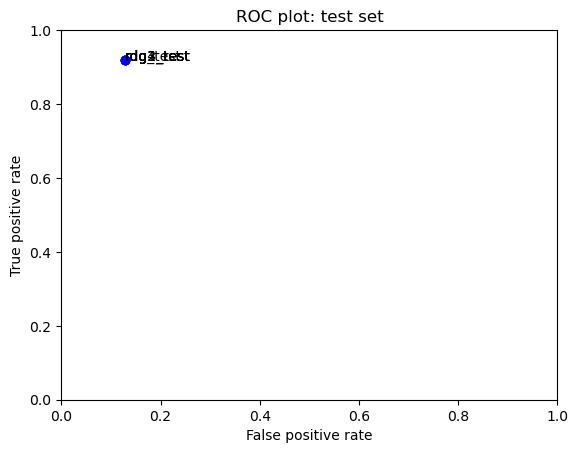

In [53]:
fits = [rdg_performance_test, rdg1_performance_test, rdg2_performance_test, rdg3_performance_test, rdg4_performance_test]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()